# Лабораторная работа 2
## Первичный и разведочный анализ данных

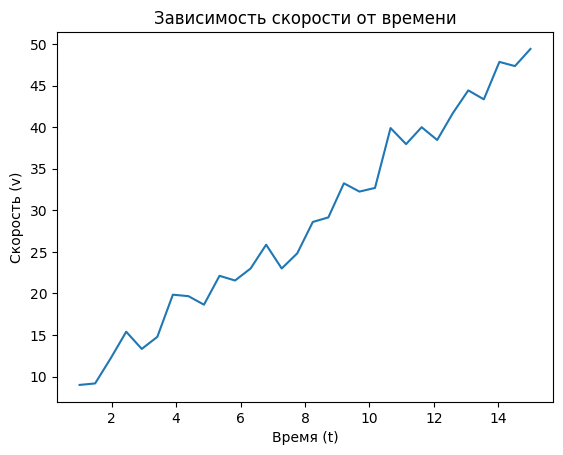

Выбросы в переменной time: []
Выбросы в переменной velocity: []
Выбросов в данных нет.


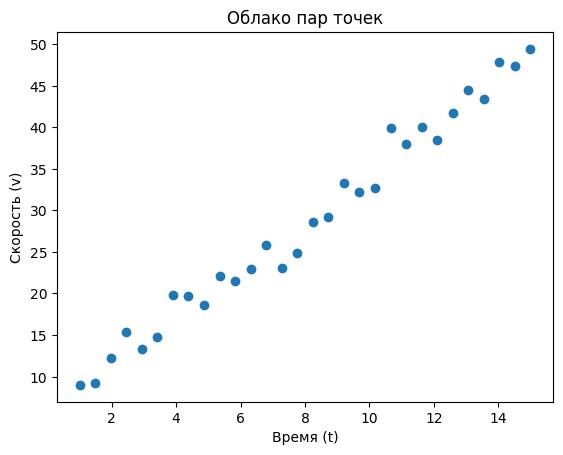

Коэффициент корреляции: 0.9904312934886528
Положительная линейная связь


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем выборку данных
def generate_data():
    np.random.seed(42)  # для воспроизводимости результатов
    n = 30
    time = np.linspace(1, 15, n)
    velocity = 3 * time + 5 + np.random.normal(0, 2, n)  # добавим шум
    return time, velocity

# Отобразим значения на графике
def plot_data(time, velocity):
    plt.plot(time, velocity)
    plt.xlabel('Время (t)')
    plt.ylabel('Скорость (v)')
    plt.title('Зависимость скорости от времени')
    plt.show()

time, velocity = generate_data()
plot_data(time, velocity)

# Проверим выборки на наличие грубых ошибок
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = (data < lower_limit) | (data > upper_limit)
    return outliers

time_outliers = detect_outliers(time)
velocity_outliers = detect_outliers(velocity)

print("Выбросы в переменной time:", time[time_outliers])
print("Выбросы в переменной velocity:", velocity[velocity_outliers])

# Общий вывод о наличии или отсутствии выбросов
def check_outliers(time_outliers, velocity_outliers):
    if any(time_outliers) or any(velocity_outliers):
        print("Обнаружены выбросы в данных.")
    else:
        print("Выбросов в данных нет.")

check_outliers(time_outliers, velocity_outliers)

# Построим облако пар точек
def scatter_plot(time, velocity):
    plt.scatter(time, velocity)
    plt.xlabel('Время (t)')
    plt.ylabel('Скорость (v)')
    plt.title('Облако пар точек')
    plt.show()

scatter_plot(time, velocity)

# Проверим гипотезу о наличии связи
def check_correlation(time, velocity):
    correlation = np.corrcoef(time, velocity)[0, 1]
    print(f"Коэффициент корреляции: {correlation}")

    if correlation > 0:
        print("Положительная линейная связь")
    elif correlation < 0:
        print("Отрицательная линейная связь")
    else:
        print("Отсутствие линейной связи")

check_correlation(time, velocity)
